In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

Below I have listed the features with a short description:

<b>survival</b>:   Survival

<b>PassengerId</b>: Unique Id of a passenger.

<b>pclass</b>: Ticket class

<b>sex</b>:    Sex 

<b>Age</b>:    Age in years

<b>sibsp</b>:  of siblings / spouses aboard the Titanic

<b>parch</b>:  of parents / children aboard the Titanic  

<b>ticket</b>: Ticket number

<b>fare</b>:   Passenger fare 

<b>cabin</b>:  Cabin number

<b>embarked</b>:   Port of Embarkation

In [2]:
os.chdir("D:\Data Science\Titanic Dataset")
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

In [6]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
test = test.merge(gender_submission, on = 'PassengerId')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [8]:
data = pd.concat([train, test], ignore_index=True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [9]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,1,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,0,2668


In [10]:
data.shape

(1309, 12)

# Handling missing values

In [11]:
data.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

Since cabin has <b> very high NaN </b> entries, let's drop it

In [12]:
data.drop('Cabin', axis = 1, inplace = True)

<b>Let's replace NaN in age column with it's mean

In [13]:
round(data['Age'].mean(), 2)

29.88

In [14]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [15]:
data['Age'].astype('int').round(2).head(5)

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

In [16]:
data['Age'].isna().sum()

0

<b>Replacing NaN in Embarked with it's mode using value_counts, since it is a categorical variable

In [17]:
data['Embarked'].fillna(data['Embarked'].value_counts().index[0],inplace = True)

In [18]:
data['Embarked'].isna().sum()

0

In [19]:
data.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.000000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.000000,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.000000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.000000,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,29.881138,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.000000,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.000000,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.000000,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.000000,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


Let's replace <b>NaN in fare</b> with it's <b>mean

In [20]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)

<b> Checking whether any column is left with NaN

In [21]:
data.isna().sum()

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
dtype: int64

# Finding outliers

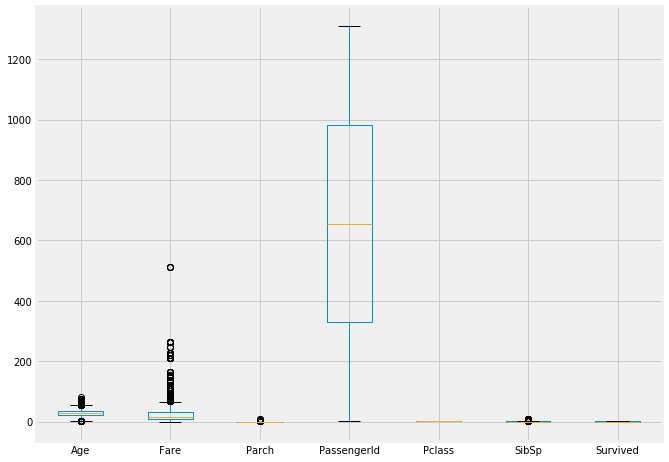

In [22]:
data.plot(kind = 'box', figsize = (10,8))

plt.show()

We can see few outliers in the <b>feature "fare"</b> but we wouldn't drop them since we can use <b>fare bins</b> to group and plot them.

# EDA - Plotting

<b>Plotting Survival Rate, gender-wise

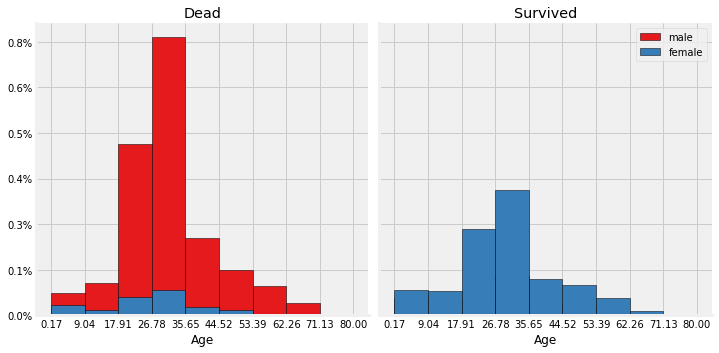

In [23]:
bins = np.linspace(data.Age.min(), data.Age.max(), 10)
g = sns.FacetGrid(data, col="Survived", hue="Sex", palette="Set1", col_wrap=2, size = 5)
g.map(plt.hist,'Age', bins=bins, ec="k")

g.set(xticks = bins)

# Plotting %'s on y-axis
from matplotlib.ticker import FuncFormatter
def to_percent(y, position):
    s = str(100*(y/(data['Age'].sum(axis = 0))).round(3))
    return s + '%'
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

# To display legend
g.axes[-1].legend()

#Change Titles
axes = g.axes.flatten()
axes[0].set_title("Dead")
axes[1].set_title("Survived")

plt.show()

<b>Plotting Survived v/s Embarked over Age

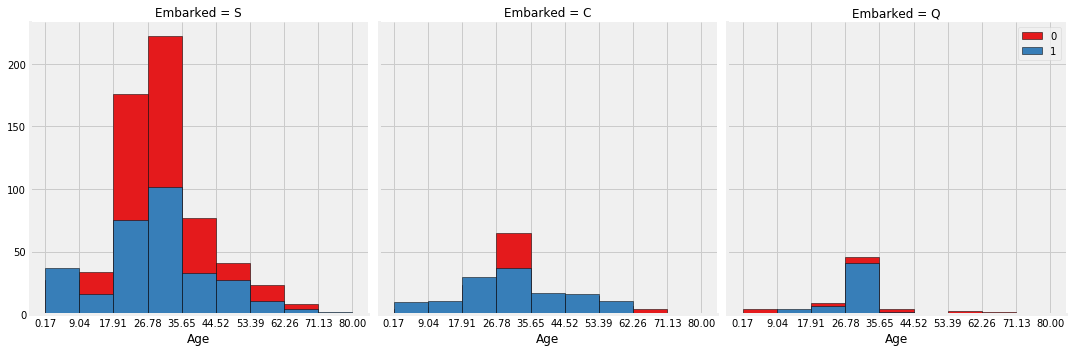

In [24]:
bins1 = np.linspace(data.Age.min(), data.Age.max(), 10)
g = sns.FacetGrid(data, col="Embarked", hue="Survived", palette="Set1", col_wrap=3, size = 5)
g.map(plt.hist,'Age', bins=bins1, ec="k")

g.axes[-1].legend()
g.set(xticks = bins1)
plt.show()

<b>Parch v/s Survival rate

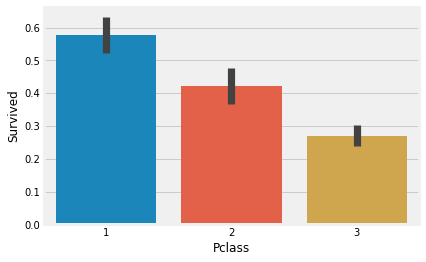

In [25]:
sns.barplot('Pclass','Survived', data = data)

The graphs shows that people belonging to <b>Pclass = 1</b> had higher chances of survival.

<b>Distribution of Survived over Pclass 

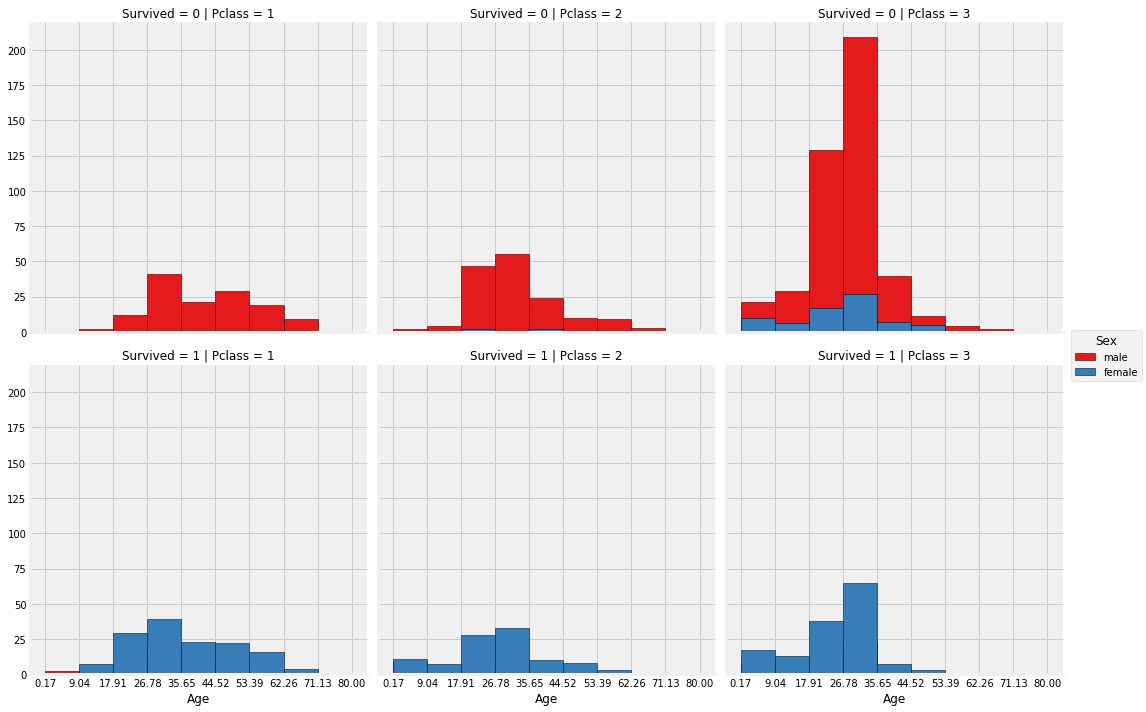

In [26]:
bins2 = np.linspace(data.Age.min(), data.Age.max(), 10)
g = sns.FacetGrid(data, col="Pclass", hue="Sex", row = 'Survived', palette="Set1", size = 5)
g.map(plt.hist,'Age', bins=bins2, ec="k")

g.add_legend()
g.set(xticks=bins2)
plt.show()

Let's <b>bin</b> fares in order to analyze better

In [27]:
data['Fare'].astype('float').head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [28]:
fare_bin = [0, 20, 40, 60, 80]

In [29]:
data.tail(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1299,29.881138,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,1,334915
1300,3.000000,S,13.7750,"Peacock, Miss. Treasteall",1,1301,3,female,1,1,SOTON/O.Q. 3101315
1301,29.881138,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,1,365237
1302,37.000000,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,1,19928
1303,28.000000,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,1,347086
1304,29.881138,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236
1305,39.000000,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,1,PC 17758
1306,38.500000,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262
1307,29.881138,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309
1308,29.881138,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,0,2668


In [30]:
data['Fare_range'] = pd.cut(data.Fare, fare_bin , include_lowest = True, labels = [1, 2, 3, 4]) 

In [31]:
data.head(15)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_range
0,22.000000,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1
1,38.000000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,4
2,26.000000,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1
3,35.000000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,3
4,35.000000,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1
5,29.881138,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,1
6,54.000000,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,3
7,2.000000,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,2
8,27.000000,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742,1
9,14.000000,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736,2


<b>Let's plot histogram of fares

(array([752., 293.,  78.,  71.]),
 array([ 0, 20, 40, 60, 80]),
 <a list of 4 Patch objects>)

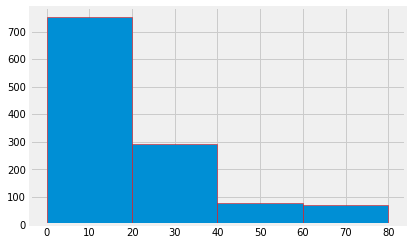

In [32]:
plt.hist(data['Fare'], bins = fare_bin, edgecolor = 'red')

<b>Let's bin age too

In [33]:
data['Age_group'] = pd.cut(data.Age, bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest = True, labels = [1, 2, 3, 4, 5, 6, 7, 8])

In [34]:
data.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_range,Age_group
0,22.000000,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,3
1,38.000000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,4,4
2,26.000000,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,3
3,35.000000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,3,4
4,35.000000,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,4
5,29.881138,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,1,3
6,54.000000,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,3,6
7,2.000000,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,2,1
8,27.000000,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742,1,3
9,14.000000,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736,2,2


Let's look at <b>Ticket</b> 

In [35]:
data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

Since Ticket has <b>681</b> unique values in dataset, it would be difficult to convert it into useful categories. So let's drop it

In [36]:
data.drop(['Ticket'], axis = 1, inplace = True)

In [37]:
data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Fare_range,Age_group
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,1,3
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,4,4
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,1,3
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,3,4
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,1,4


Also, since all <b>names</b> are unique, above procedure has to be followed with names

In [38]:
data.drop(['Name'], axis = 1, inplace = True)

In [39]:
data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Fare_range,Age_group
0,22.0,S,7.2500,0,1,3,male,1,0,1,3
1,38.0,C,71.2833,0,2,1,female,1,1,4,4
2,26.0,S,7.9250,0,3,3,female,0,1,1,3
3,35.0,S,53.1000,0,4,1,female,1,1,3,4
4,35.0,S,8.0500,0,5,3,male,0,0,1,4


# Converting categorical variables into numerical variables

<b>Features before One Hot Encoding

In [40]:
data[['Embarked','Sex']].head()

,Embarked,Sex
0,S,male
1,C,female
2,S,female
3,S,female
4,S,male


Feature after <b>One Hot Encoding</b>

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
enc = OneHotEncoder(sparse = False)

In [43]:
enc.fit(data[['Embarked','Sex']])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [44]:
enc.transform(data[['Embarked','Sex']])

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [45]:
# Converting returned array into a DataFrame

data2 = pd.DataFrame(enc.transform(data[['Embarked','Sex']]), columns = ['Embarked_P', 'Embarked_S', 'Embarked_Q', 'Male', 'Female'])

In [46]:
data2.head(10)

,Embarked_P,Embarked_S,Embarked_Q,Male,Female
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,1.0
8,0.0,0.0,1.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0


In [47]:
data = pd.concat([data, data2], axis = 1)

In [48]:
data.shape

(1309, 16)

In [49]:
data.drop(['Embarked', 'Sex'], axis = 1, inplace= True)

In [50]:
data.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Fare_range,Age_group,Embarked_P,Embarked_S,Embarked_Q,Male,Female
0,22.0,7.2500,0,1,3,1,0,1,3,0.0,0.0,1.0,0.0,1.0
1,38.0,71.2833,0,2,1,1,1,4,4,1.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0,3,3,0,1,1,3,0.0,0.0,1.0,1.0,0.0
3,35.0,53.1000,0,4,1,1,1,3,4,0.0,0.0,1.0,1.0,0.0
4,35.0,8.0500,0,5,3,0,0,1,4,0.0,0.0,1.0,0.0,1.0


Let's drop <b>Age_group</b> and <b>Fare_range</b> since algorithms will treat them as new features

In [51]:
data.drop(['Age_group', 'Fare_range'], axis = 1, inplace= True)
data.head(5)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Embarked_P,Embarked_S,Embarked_Q,Male,Female
0,22.0,7.2500,0,1,3,1,0,0.0,0.0,1.0,0.0,1.0
1,38.0,71.2833,0,2,1,1,1,1.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0,3,3,0,1,0.0,0.0,1.0,1.0,0.0
3,35.0,53.1000,0,4,1,1,1,0.0,0.0,1.0,1.0,0.0
4,35.0,8.0500,0,5,3,0,0,0.0,0.0,1.0,0.0,1.0


In [52]:
data.isna().sum() # to check if we are left with any NaN

Age            0
Fare           0
Parch          0
PassengerId    0
Pclass         0
SibSp          0
Survived       0
Embarked_P     0
Embarked_S     0
Embarked_Q     0
Male           0
Female         0
dtype: int64

# Modelling

Define <b>Features</b> and <b>label

In [53]:
X = data.drop('Survived', axis= 1)
X.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Embarked_P,Embarked_S,Embarked_Q,Male,Female
0,22.0,7.2500,0,1,3,1,0.0,0.0,1.0,0.0,1.0
1,38.0,71.2833,0,2,1,1,1.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0,3,3,0,0.0,0.0,1.0,1.0,0.0
3,35.0,53.1000,0,4,1,1,0.0,0.0,1.0,1.0,0.0
4,35.0,8.0500,0,5,3,0,0.0,0.0,1.0,0.0,1.0


In [54]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 891, shuffle = False, random_state=4 )

In [56]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (891, 11) (891,)
Test set: (418, 11) (418,)


# Logistic Regression

In [57]:
lr = LogisticRegression(C = 0.01, solver = 'liblinear')

In [58]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Finding observed values of y known as <b>ypred</b>, also called as <b>yhat

In [59]:
y_pred = lr.predict(X_test)

In [60]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

# SVM

In [61]:
from sklearn import svm

t_svm = svm.SVC(kernel = 'rbf', probability = True, gamma = 'auto')

In [62]:
t_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
yhat_svm = t_svm.predict(X_test)

In [64]:
yhat_svm[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Decision Trees

In [65]:
t_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)

In [66]:
t_dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
t_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
yhat_dt = t_dt.predict(X_test)

In [69]:
yhat_dt[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<b>Normalize</b> data before we use it for KNN

In [70]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
X

array([[-0.61197171, -0.50359486, -0.4449995 , ...,  0.65501092,
        -0.74349692,  0.74349692],
       [ 0.63043107,  0.73450256, -0.4449995 , ..., -1.52669211,
         1.34499549, -1.34499549],
       [-0.30137101, -0.49054359, -0.4449995 , ...,  0.65501092,
         1.34499549, -1.34499549],
       ...,
       [ 0.66925616, -0.50359486, -0.4449995 , ...,  0.65501092,
        -0.74349692,  0.74349692],
       [ 0.        , -0.48812669, -0.4449995 , ...,  0.65501092,
        -0.74349692,  0.74349692],
       [ 0.        , -0.21147268,  0.71076309, ..., -1.52669211,
        -0.74349692,  0.74349692]])

# K Nearest Neighbors

<b>Training and Predicting with variable k

In [71]:
ks = 15

mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks-1))

In [72]:
for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n)
    sol = neigh.fit(X_train, y_train)
    yhat_knn = sol.predict(X_test)
    mean_acc[n-1] = jaccard_similarity_score(y_test, yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
    
print(mean_acc)

[0.         0.         0.63157895 0.6507177  0.64832536 0.65311005
 0.6507177  0.65311005 0.6507177  0.6507177  0.63636364 0.65550239
 0.65550239 0.6507177 ]


In [73]:
knn_jaccard = mean_acc.max().round(2)
knn_jaccard

0.66

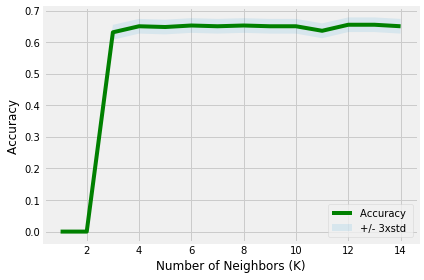

In [74]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Evaluation metric

In [75]:
a = f1_score(y_test, y_pred, average ='weighted')

In [76]:
a.round(2)

0.88

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       266
           1       0.84      0.81      0.83       152

   micro avg       0.88      0.88      0.88       418
   macro avg       0.87      0.86      0.86       418
weighted avg       0.87      0.88      0.88       418



# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)

In [80]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [81]:
yhat_rf = random_forest.predict(X_test)

In [82]:
acc_rf= round(random_forest.score(X_train, y_train)* 100, 2)
acc_rf

100.0

This is the accuracy on train data. Now, let's find accuracy on <b>test</b> data

In [83]:
acc_rf_test= round(random_forest.score(X_test, y_test)* 100, 2)
acc_rf_test

80.38